# Stock Price Prediction and Forecasting Using Stacked LSTM - Deep Learning

In [1]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import yfinance as yf
import keras

import math
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [2]:
# Historical Carnival Cruise Stock Price:
# OHLCV using yfinance
# Loading the stocks data
ccl = yf.download("CCL", start="2016-01-01", end="2021-01-21", 
    index_col="Date", infer_datetime_format=True, parse_dates=True)
ccl.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [3]:
# Historical Delta Airlines Stock Price:
# OHLCV using yfinance
# Loading the stocks data
dal = yf.download("DAL", start="2016-01-01", end="2021-01-21", 
    index_col="Date", infer_datetime_format=True, parse_dates=True)
dal.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [4]:
# Historical ETSY Stock Price:
# OHLCV using yfinance
# Loading the stocks data
etsy = yf.download("ETSY", start="2016-01-01", end="2021-01-21", 
    index_col="Date", infer_datetime_format=True, parse_dates=True)
etsy.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [5]:
# Historical L Brands Stock Price:
# OHLCV using yfinance
# Loading the stocks data
PP = yf.download("PYPL", start="2016-01-01", end="2021-01-21", 
    index_col="Date", infer_datetime_format=True, parse_dates=True)
PP.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [6]:
# Historical SPY Stock Price:
# OHLCV using yfinance
# Loading the stocks data
spy = yf.download("SPY", start="2016-01-01", end="2021-01-21", 
    index_col="Date", infer_datetime_format=True, parse_dates=True)
spy.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [7]:
#Creating a new dataframe for the SPY during covid
covid_spy = spy['2020-02-21' :'2021-01-22']
covid_spy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-21,335.470001,335.809998,332.579987,333.480011,327.366516,113788200
2020-02-24,323.140015,333.559998,321.239990,322.420013,316.509247,161088400
2020-02-25,323.940002,324.609985,311.690002,312.649994,306.918335,218913200
2020-02-26,314.179993,318.109985,310.700012,311.500000,305.789459,194773800
2020-02-27,305.459991,311.559998,297.510010,297.510010,292.055939,284353500


Text(0, 0.5, 'SPY Close price in $')

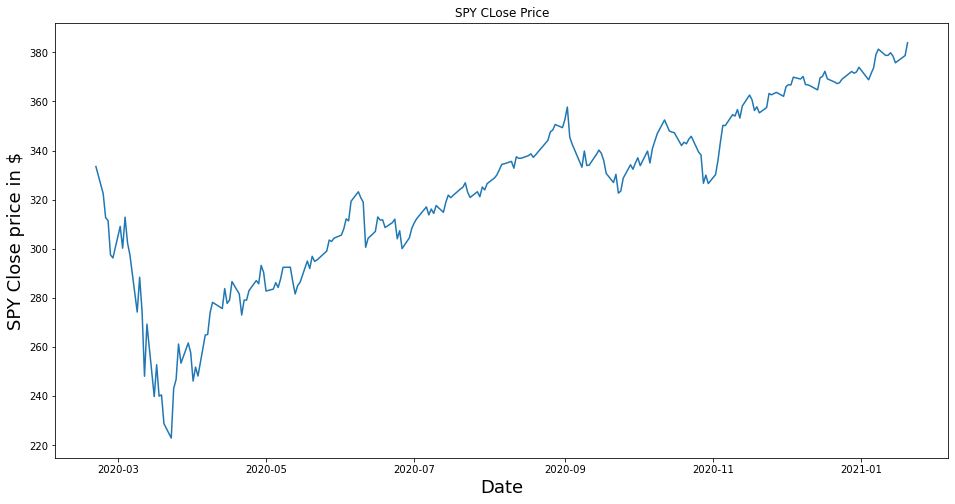

In [8]:
#Plotting the SPY historical close prices
plt.figure(figsize=(16,8))
plt.title("SPY CLose Price")
plt.plot(covid_spy["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("SPY Close price in $", fontsize=18)

In [9]:
#Creating a new dataframe with only the closing price
data = covid_spy.filter(['Close'])

#converting data to a numpy array
dataset = data.values
len(dataset)

231

In [10]:
#Preparing the training data using 70% of the data for training
training_data_size = math.ceil(len(dataset)*.7)
training_data_size

162

In [11]:
#Normalizing the data using MinMaxScaler (making all the values between 0 and 1)
scaler = MinMaxScaler(feature_range=(0,1))

#fitting and scaling the features
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.68677769],
       [0.61805645],
       [0.55735049],
       [0.550205  ],
       [0.46327827],
       [0.4555114 ],
       [0.53523046],
       [0.48024099],
       [0.55865527],
       [0.49403496],
       [0.46296748],
       [0.31862811],
       [0.40679762],
       [0.31943571],
       [0.15633156],
       [0.28811983],
       [0.10500812],
       [0.18547286],
       [0.10594011],
       [0.10910896],
       [0.03634898],
       [0.        ],
       [0.12551258],
       [0.1481297 ],
       [0.23766628],
       [0.1893252 ],
       [0.24046224],
       [0.21622965],
       [0.14415307],
       [0.17944577],
       [0.15682865],
       [0.2604075 ],
       [0.26208527],
       [0.31738534],
       [0.3432957 ],
       [0.32751336],
       [0.37802911],
       [0.34056174],
       [0.3488878 ],
       [0.39573761],
       [0.36435934],
       [0.31123404],
       [0.3488878 ],
       [0.34876341],
       [0.372934  ],
       [0.39828497],
       [0.39008331],
       [0.436

In [12]:
#LSTM specifying the shape of the input (3 dimetional, number of samples, steps and features) 
#Creating the training dataset
train_data = scaled_data[0:training_data_size, :]

#splitting the data into x_train and y_train
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i,0])
    if i<=31:
        print(x_train)
        print(y_train)

In [13]:
#Converting y_train to a numpy array
y_train = np.asarray(y_train)

In [14]:
#Converting x_train to a numpy array
x_train, Y_train = np.array(x_train), np.array(y_train)

#reshaping the data into 3d
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(102, 30, 1)

### Building Compiling training and testing the LSTM model

In [15]:
#Building the LSTM model using sequential
model=Sequential()

#Layer1
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))

#Layer2
model.add(LSTM(50, return_sequences=False))

#Layer3
model.add(Dense(25))

#Output layer
model.add(Dense(1))

In [16]:
#Summarizing the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [17]:
#Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
# Training the model
# Using at least 10 epochs
model.fit(x_train, y_train, batch_size=5, epochs=10, shuffle = False)

Epoch 1/10
21/21 [==============================] - 19s 123ms/step - loss: 0.1100
Epoch 2/10
21/21 [==============================] - 3s 123ms/step - loss: 0.0026
Epoch 3/10
21/21 [==============================] - 3s 158ms/step - loss: 0.0026
Epoch 4/10
21/21 [==============================] - 3s 145ms/step - loss: 0.0028
Epoch 5/10
21/21 [==============================] - 3s 130ms/step - loss: 0.0034
Epoch 6/10
21/21 [==============================] - 3s 137ms/step - loss: 0.0045
Epoch 7/10
21/21 [==============================] - 3s 130ms/step - loss: 0.0065
Epoch 8/10
21/21 [==============================] - 3s 126ms/step - loss: 0.0089
Epoch 9/10
21/21 [==============================] - 3s 138ms/step - loss: 0.0105 0s - loss: 0.0
Epoch 10/10
21/21 [==============================] - 3s 152ms/step - loss: 0.0106


In [19]:
#Using 30% of dataset for testing the model
test_data = scaled_data[training_data_size - 30: , :]
x_test = []
y_test = dataset[training_data_size:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])

In [20]:
#Converting the x_test to a numpy array
x_test = np.array(x_test)

In [21]:
#Reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [22]:
#Making some predictions
predictions = model.predict(x_test)

#getting the values of prediction
predictions = scaler.inverse_transform(predictions)

In [23]:
#Evaluating the model using Root Mean Square Error
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.260100876075634

<function matplotlib.pyplot.show(close=None, block=None)>

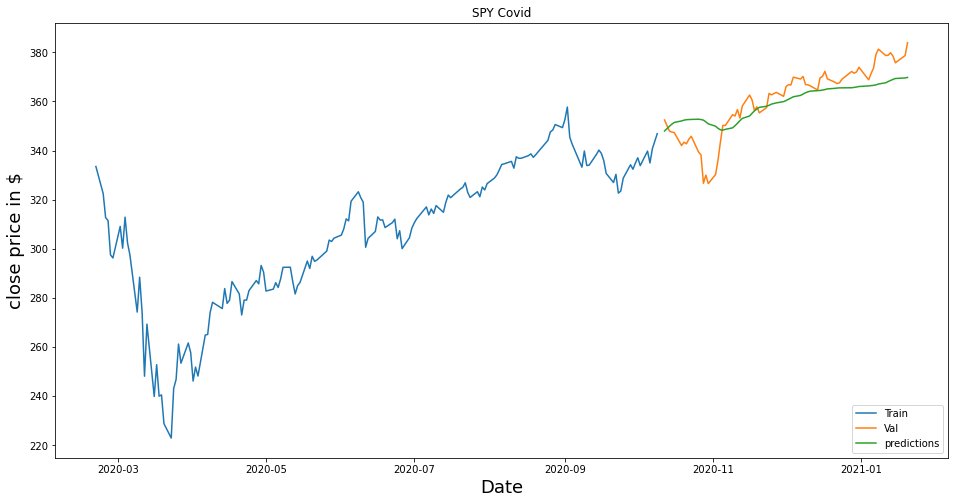

In [24]:
#Plotting the prediction and the actual values data as a line chart
train = data[:training_data_size]
valid = data[training_data_size:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('SPY Covid')
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price in $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show

In [25]:
#Printing the data in a table
valid

,Close,predictions
Date,,
2020-10-12,352.429993,347.937622
2020-10-13,350.130005,348.892181
2020-10-14,347.929993,349.855133
2020-10-15,347.500000,350.704895
2020-10-16,347.290009,351.427429
...,...,...
2021-01-13,379.790009,368.507782
2021-01-14,378.459991,368.948212
2021-01-15,375.700012,369.312256


In [26]:
#Slicing cc_df to covid times and creating a new dataframe.
covid_ccl = ccl['2020-02-21' :'2021-01-22']
covid_ccl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-21,42.110001,42.189999,41.650002,41.689999,41.689999,8009800
2020-02-24,39.380001,39.750000,37.759998,37.759998,37.759998,15441400
2020-02-25,38.000000,38.110001,35.669998,35.840000,35.840000,16153700
2020-02-26,36.169998,36.189999,32.380001,33.139999,33.139999,23492300
2020-02-27,32.650002,33.700001,30.190001,31.850000,31.850000,31486400


Text(0, 0.5, 'CCL Close price in $')

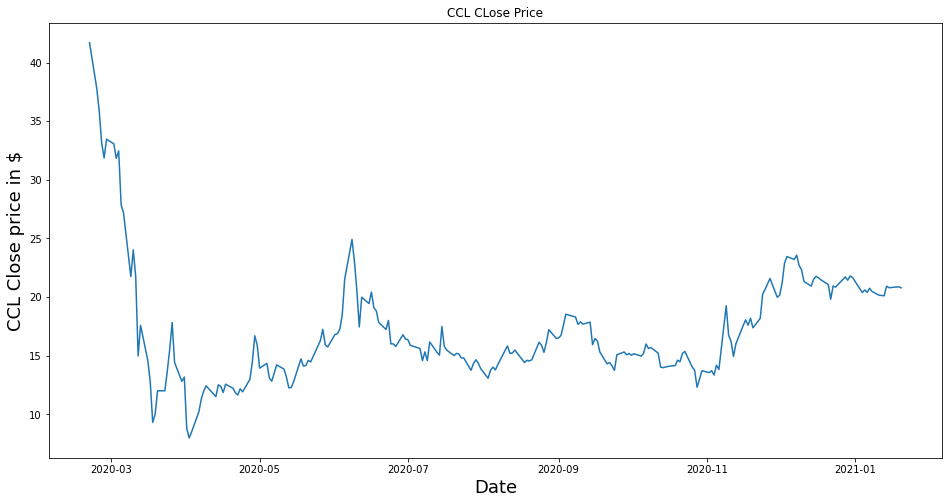

In [27]:
#Plotting the historical close price
plt.figure(figsize=(16,8))
plt.title("CCL CLose Price")
plt.plot(covid_ccl["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("CCL Close price in $", fontsize=18)

In [28]:
#Creating a new dataframe with only the closing price
data = covid_ccl.filter(['Close'])

#converting data to a numpy array
dataset = data.values
len(dataset)

231

In [29]:
#Preparing the training data using 70% of the data for training
training_data_size = math.ceil(len(dataset)*.7)
training_data_size

162

In [30]:
#Normalizing the data using MinMaxScaler (making all the values between 0 and 1)
scaler = MinMaxScaler(feature_range=(0,1))

#fitting and scaling the features
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[1.        ],
       [0.88345194],
       [0.82651249],
       [0.7464413 ],
       [0.7081851 ],
       [0.7559312 ],
       [0.74406887],
       [0.70759196],
       [0.72627521],
       [0.59015426],
       [0.56880191],
       [0.408363  ],
       [0.47597868],
       [0.40865957],
       [0.20759195],
       [0.28499408],
       [0.19572954],
       [0.14056941],
       [0.03944248],
       [0.06020167],
       [0.11951365],
       [0.11951365],
       [0.16933573],
       [0.22479243],
       [0.29211151],
       [0.19098459],
       [0.14323845],
       [0.15421116],
       [0.02461448],
       [0.        ],
       [0.01542112],
       [0.06642943],
       [0.09875446],
       [0.11921709],
       [0.13196917],
       [0.10468566],
       [0.13463821],
       [0.13078293],
       [0.11506526],
       [0.13612102],
       [0.12603798],
       [0.1147687 ],
       [0.10883751],
       [0.12455517],
       [0.11684461],
       [0.14857651],
       [0.19246739],
       [0.258

In [31]:
#LSTM specifying the shape of the input (3 dimetional, number of samples, steps and features) 
#Creating the training dataset 
train_data = scaled_data[0:training_data_size, :]

#splitting the data into x_train and y_train
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i,0])
    if i<=31:
        print(x_train)
        print(y_train)

In [32]:
#converting y_train to a numpy array
y_train = np.asarray(y_train)

In [33]:
#converting x_train to a numpy array
x_train, Y_train = np.array(x_train), np.array(y_train)

#reshaping the data into 3d
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(102, 30, 1)

### Building Compiling training and testing the LSTM model

In [34]:
#Building the LSTM model using sequential
model=Sequential()

#Layer1
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))

#Layer2
model.add(LSTM(50, return_sequences=False))

#Layer3
model.add(Dense(25))

#Output Layer
model.add(Dense(1))

In [35]:
# Summarizing the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 30, 50)            10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [36]:
#Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [37]:
# Training the model
# Using at least 10 epochs
model.fit(x_train, y_train, batch_size=5, epochs=10, shuffle = False)

Epoch 1/10
21/21 [==============================] - 15s 109ms/step - loss: 0.0240
Epoch 2/10
21/21 [==============================] - 3s 129ms/step - loss: 0.0075
Epoch 3/10
21/21 [==============================] - 3s 129ms/step - loss: 0.0055
Epoch 4/10
21/21 [==============================] - 3s 137ms/step - loss: 0.0049
Epoch 5/10
21/21 [==============================] - 3s 130ms/step - loss: 0.0051
Epoch 6/10
21/21 [==============================] - 3s 147ms/step - loss: 0.0050
Epoch 7/10
21/21 [==============================] - 3s 131ms/step - loss: 0.0048
Epoch 8/10
21/21 [==============================] - 3s 134ms/step - loss: 0.0047
Epoch 9/10
21/21 [==============================] - 3s 127ms/step - loss: 0.0045
Epoch 10/10
21/21 [==============================] - 3s 123ms/step - loss: 0.0043


In [38]:
#Using 30% of dataset for testing the model
test_data = scaled_data[training_data_size - 30: , :]
x_test = []
y_test = dataset[training_data_size:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])

In [39]:
#Converting the x_test to a numpy array
x_test = np.array(x_test)

In [40]:
#Reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [41]:
#Making some predictions
predictions = model.predict(x_test)

#getting the values of prediction
predictions = scaler.inverse_transform(predictions)

In [42]:
#Evaluating the model using Root Mean Square Error
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

2.2856080290200054

<function matplotlib.pyplot.show(close=None, block=None)>

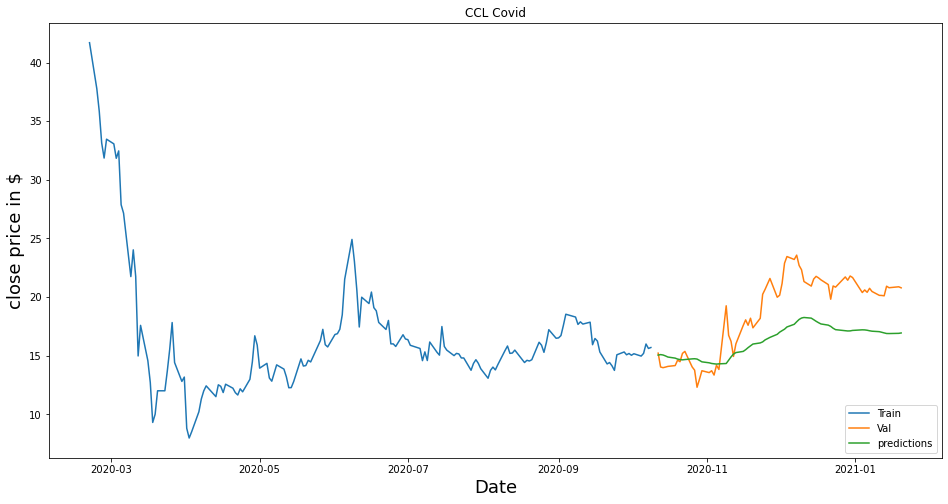

In [43]:
#Plotting the prediction and the actual values data as a line chart
train = data[:training_data_size]
valid = data[training_data_size:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('CCL Covid')
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price in $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show

In [44]:
#Printing the data in a table
valid

,Close,predictions
Date,,
2020-10-12,15.210000,15.043754
2020-10-13,14.030000,15.086662
2020-10-14,13.970000,15.052407
2020-10-15,14.020000,14.973789
2020-10-16,14.080000,14.878621
...,...,...
2021-01-13,20.100000,16.935913
2021-01-14,20.920000,16.885614
2021-01-15,20.790001,16.881985


In [45]:
#Slicing dal_df to covid times and creating a new dataframe.
covid_dal = dal['2020-02-21' :'2021-01-22']
covid_dal.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-21,57.959999,58.020000,56.869999,57.869999,57.869999,6295600
2020-02-24,54.830002,55.380001,53.340000,54.230000,54.230000,17983100
2020-02-25,54.540001,54.709999,50.750000,50.889999,50.889999,15836500
2020-02-26,51.439999,51.770000,49.000000,49.590000,49.590000,15985900
2020-02-27,46.720001,50.980000,45.029999,48.189999,48.189999,21949100


Text(0, 0.5, 'Delta Close price in $')

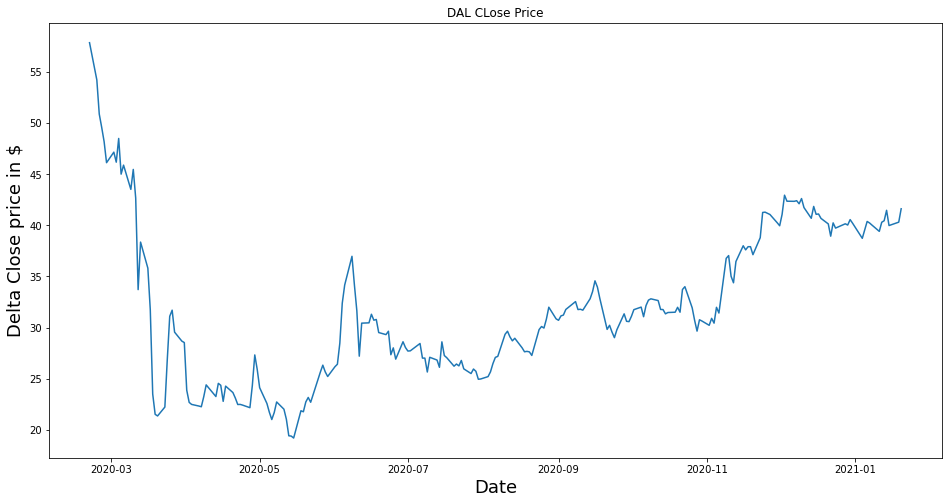

In [46]:
#Plotting dal historical close prices
plt.figure(figsize=(16,8))
plt.title("DAL CLose Price")
plt.plot(covid_dal["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Delta Close price in $", fontsize=18)

In [47]:
#Creating a new dataframe with only the closing price
data = covid_dal.filter(['Close'])

#converting data to a numpy array
dataset = data.values
len(dataset)

231

In [48]:
#Preparing the training data using 70% of the data for training
training_data_size = math.ceil(len(dataset)*.7)
training_data_size

162

In [49]:
#Normalizing the data using MinMaxScaler (making all the values between 0 and 1)
scaler = MinMaxScaler(feature_range=(0,1))

#fitting and scaling the features
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[1.        ],
       [0.90589453],
       [0.81954499],
       [0.78593591],
       [0.74974145],
       [0.69648401],
       [0.72311273],
       [0.69777665],
       [0.75775596],
       [0.66752841],
       [0.69027921],
       [0.62900726],
       [0.67942094],
       [0.60703202],
       [0.37538778],
       [0.49560499],
       [0.42967946],
       [0.32445708],
       [0.11116855],
       [0.05997931],
       [0.05584281],
       [0.07833503],
       [0.19906927],
       [0.30791107],
       [0.32342298],
       [0.26783865],
       [0.2450879 ],
       [0.24146847],
       [0.12099277],
       [0.09022751],
       [0.08505685],
       [0.08092035],
       [0.07911064],
       [0.10444672],
       [0.13443638],
       [0.1049638 ],
       [0.13831439],
       [0.13340228],
       [0.09281283],
       [0.13133403],
       [0.11504651],
       [0.10108583],
       [0.08479832],
       [0.08505685],
       [0.08324714],
       [0.07678385],
       [0.13314374],
       [0.210

In [50]:
#LSTM specifying the shape of the input (3 dimetional, number of samples, steps and features) 
#Creating the training dataset 
train_data = scaled_data[0:training_data_size, :]

#splitting the data into x_train and y_train
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i,0])
    if i<=31:
        print(x_train)
        print(y_train)

In [51]:
#converting y_train to a numpy array
y_train = np.asarray(y_train)

In [52]:
#converting x_train to a numpy array
x_train, Y_train = np.array(x_train), np.array(y_train)

#reshaping the data into 3d
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(102, 30, 1)

### Building Compiling training and testing the LSTM model

In [53]:
#Building the LSTM model using sequential
model=Sequential()

#Layer1
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))

#Layer2
model.add(LSTM(50, return_sequences=False))

#Layer3
model.add(Dense(25))

#Output Layer
model.add(Dense(1))

In [54]:
# Summarizing the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 30, 50)            10400     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [55]:
#Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [56]:
# Training the model
# Using at least 10 epochs
model.fit(x_train, y_train, batch_size=5, epochs=10, shuffle = False)

Epoch 1/10
21/21 [==============================] - 15s 102ms/step - loss: 0.0158
Epoch 2/10
21/21 [==============================] - 2s 96ms/step - loss: 0.0090: 0s - loss: 0.0
Epoch 3/10
21/21 [==============================] - 2s 102ms/step - loss: 0.0062
Epoch 4/10
21/21 [==============================] - 3s 130ms/step - loss: 0.0056
Epoch 5/10
21/21 [==============================] - 3s 123ms/step - loss: 0.0055
Epoch 6/10
21/21 [==============================] - 3s 121ms/step - loss: 0.0053
Epoch 7/10
21/21 [==============================] - 3s 121ms/step - loss: 0.0052
Epoch 8/10
21/21 [==============================] - 3s 127ms/step - loss: 0.0050
Epoch 9/10
21/21 [==============================] - 2s 119ms/step - loss: 0.0048
Epoch 10/10
21/21 [==============================] - 3s 125ms/step - loss: 0.0047


In [57]:
#Using 30% of dataset for testing the model
test_data = scaled_data[training_data_size - 30: , :]
x_test = []
y_test = dataset[training_data_size:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])

In [58]:
#Converting the x_test to a numpy array
x_test = np.array(x_test)

In [59]:
#Reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [60]:
#Making some predictions
predictions = model.predict(x_test)

#getting the values of prediction
predictions = scaler.inverse_transform(predictions)

In [61]:
#Evaluating the model using Root Mean Square Error
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

3.4761813067007754

<function matplotlib.pyplot.show(close=None, block=None)>

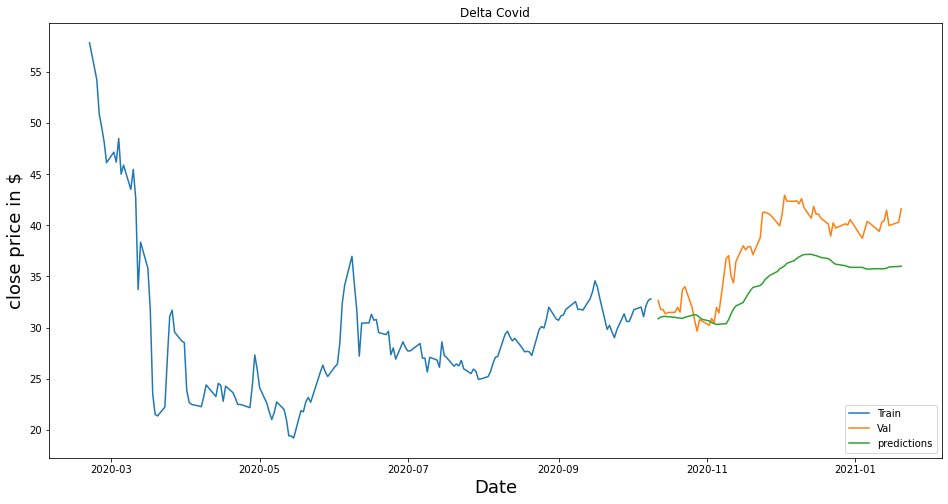

In [62]:
#Plotting the prediction and the actual values data as a line chart
train = data[:training_data_size]
valid = data[training_data_size:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Delta Covid')
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price in $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show

In [63]:
#Printing the data in a table
valid

,Close,predictions
Date,,
2020-10-12,32.639999,30.860138
2020-10-13,31.770000,31.010710
2020-10-14,31.760000,31.077379
2020-10-15,31.340000,31.094328
2020-10-16,31.469999,31.055637
...,...,...
2021-01-13,40.450001,35.757431
2021-01-14,41.470001,35.803890
2021-01-15,39.980000,35.927849


In [64]:
#Slicing etsy to precovid times and creating a new dataframe

In [65]:
etsy_covid = etsy['2020-02-21' :'2021-01-22']
etsy_covid.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-21,54.180000,54.270000,52.840000,53.700001,53.700001,2006000
2020-02-24,50.970001,51.939999,50.060001,51.330002,51.330002,3818600
2020-02-25,52.049999,52.759998,49.200001,49.889999,49.889999,3998100
2020-02-26,50.290001,52.650002,50.000000,50.689999,50.689999,6523100
2020-02-27,55.424999,60.080002,53.810001,57.919998,57.919998,13157400


Text(0, 0.5, 'ETSY Close price in $')

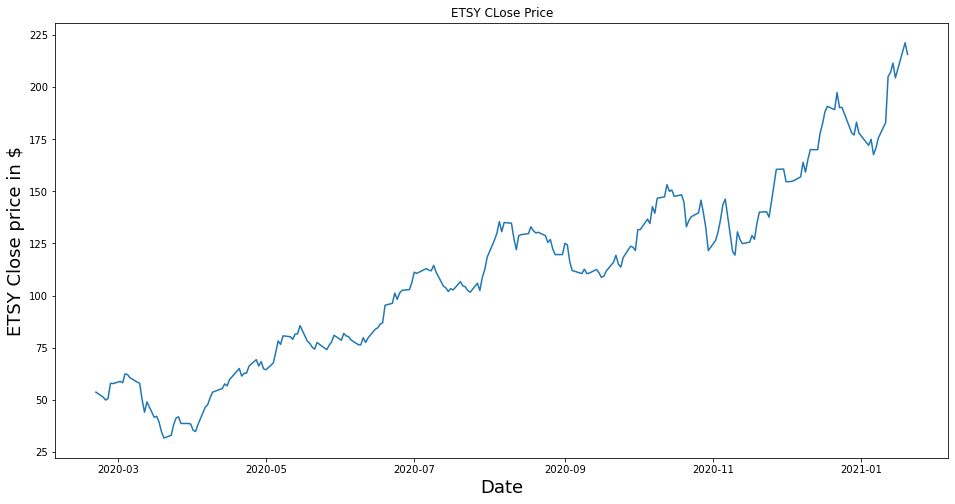

In [66]:
#Plotting the historical close prices
plt.figure(figsize=(16,8))
plt.title("ETSY CLose Price")
plt.plot(etsy_covid["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("ETSY Close price in $", fontsize=18)

In [67]:
#Creating a new dataframe with only the closing price
data = etsy_covid.filter(['Close'])

#converting data to a numpy array
dataset = data.values
len(dataset)

231

In [68]:
#Preparing the training data using 70% of the data for training
training_data_size = math.ceil(len(dataset)*.7)
training_data_size

162

In [69]:
#Normalizing the data using MinMaxScaler (making all the values between 0 and 1)
scaler = MinMaxScaler(feature_range=(0,1))

#fitting and scaling the features
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.11607426],
       [0.10357558],
       [0.09598143],
       [0.10020039],
       [0.13832928],
       [0.13774919],
       [0.1431811 ],
       [0.13985866],
       [0.16227191],
       [0.16053159],
       [0.15272651],
       [0.14138804],
       [0.13859298],
       [0.09777449],
       [0.06513026],
       [0.09134057],
       [0.05252611],
       [0.05500474],
       [0.03986921],
       [0.0156629 ],
       [0.        ],
       [0.00706676],
       [0.03396267],
       [0.05062757],
       [0.05373906],
       [0.03681045],
       [0.03681045],
       [0.0355975 ],
       [0.01982913],
       [0.01640122],
       [0.03406814],
       [0.07789262],
       [0.08437928],
       [0.10183525],
       [0.11596878],
       [0.12525049],
       [0.13695813],
       [0.13200085],
       [0.14782197],
       [0.15488873],
       [0.17593083],
       [0.15652357],
       [0.16380129],
       [0.16432865],
       [0.18194285],
       [0.19823858],
       [0.18225926],
       [0.193

In [70]:
#LSTM specifying the shape of the input (3 dimetional, number of samples, steps and features) 
#Creating the training dataset 
train_data = scaled_data[0:training_data_size, :]

#splitting the data into x_train and y_train
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i,0])
    if i<=31:
        print(x_train)
        print(y_train)

In [71]:
#converting y_train to a numpy array
y_train = np.asarray(y_train)

In [72]:
#converting x_train to a numpy array
x_train, Y_train = np.array(x_train), np.array(y_train)

#reshaping the data into 3d
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(102, 30, 1)

### Building Compiling training and testing the LSTM model

In [73]:
#Building the LSTM model using sequential
model=Sequential()

#Layer1
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))

#Layer2
model.add(LSTM(50, return_sequences=False))

#Layer3
model.add(Dense(25))

#Output Layer
model.add(Dense(1))

In [74]:
# Summarizing the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 30, 50)            10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_6 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [75]:
#Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [76]:
# Training the model
# Using at least 10 epochs
model.fit(x_train, y_train, batch_size=5, epochs=10, shuffle = False)

Epoch 1/10
21/21 [==============================] - 15s 100ms/step - loss: 0.0192
Epoch 2/10
21/21 [==============================] - 2s 101ms/step - loss: 0.0077
Epoch 3/10
21/21 [==============================] - 2s 102ms/step - loss: 0.0035
Epoch 4/10
21/21 [==============================] - 2s 102ms/step - loss: 0.0021
Epoch 5/10
21/21 [==============================] - 2s 95ms/step - loss: 0.0018
Epoch 6/10
21/21 [==============================] - 2s 93ms/step - loss: 0.0018
Epoch 7/10
21/21 [==============================] - 2s 110ms/step - loss: 0.0018
Epoch 8/10
21/21 [==============================] - 3s 139ms/step - loss: 0.0017
Epoch 9/10
21/21 [==============================] - 3s 130ms/step - loss: 0.0016
Epoch 10/10
21/21 [==============================] - 2s 116ms/step - loss: 0.0015


In [77]:
#Using 30% of dataset for testing the model
test_data = scaled_data[training_data_size - 30: , :]
x_test = []
y_test = dataset[training_data_size:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])

In [78]:
#Converting the x_test to a numpy array
x_test = np.array(x_test)

In [79]:
#Reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [80]:
#Making some predictions
predictions = model.predict(x_test)

#getting the values of prediction
predictions = scaler.inverse_transform(predictions)

In [81]:
#Evaluating the model using Root Mean Square Error
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

12.745665066484092

<function matplotlib.pyplot.show(close=None, block=None)>

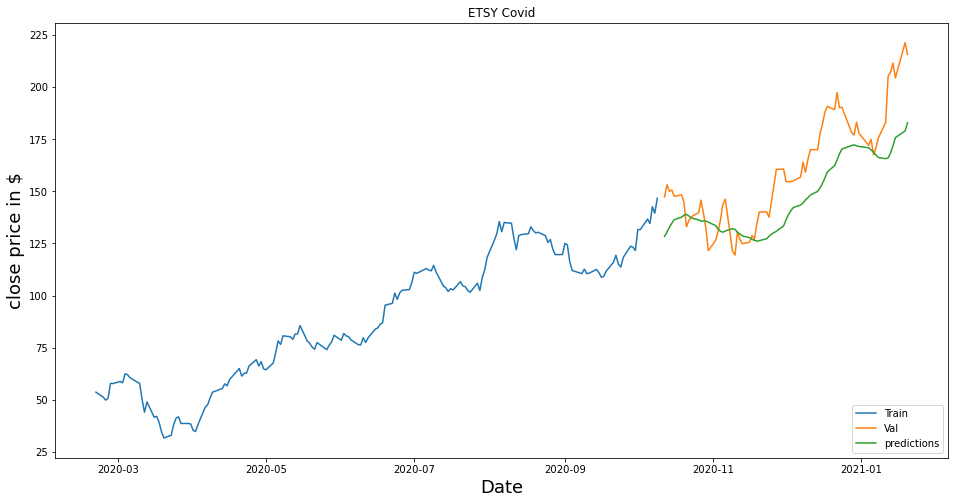

In [82]:
#Plotting the prediction and the actual values data as a line chart
train = data[:training_data_size]
valid = data[training_data_size:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('ETSY Covid')
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price in $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show

In [83]:
#Slicing PP to covid times and creating a new dataframe
covid_pp = PP['2020-02-21' :'2021-01-22']
covid_pp.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-21,121.720001,121.849998,118.529999,119.489998,119.489998,5894500
2020-02-24,114.290001,116.790001,113.519997,116.440002,116.440002,10139300
2020-02-25,115.669998,116.415001,109.330002,109.660004,109.660004,13636100
2020-02-26,109.809998,112.629997,108.599998,109.110001,109.110001,10301800
2020-02-27,106.300003,112.050003,106.300003,107.839996,107.839996,15461900


Text(0.5, 0, 'Date')

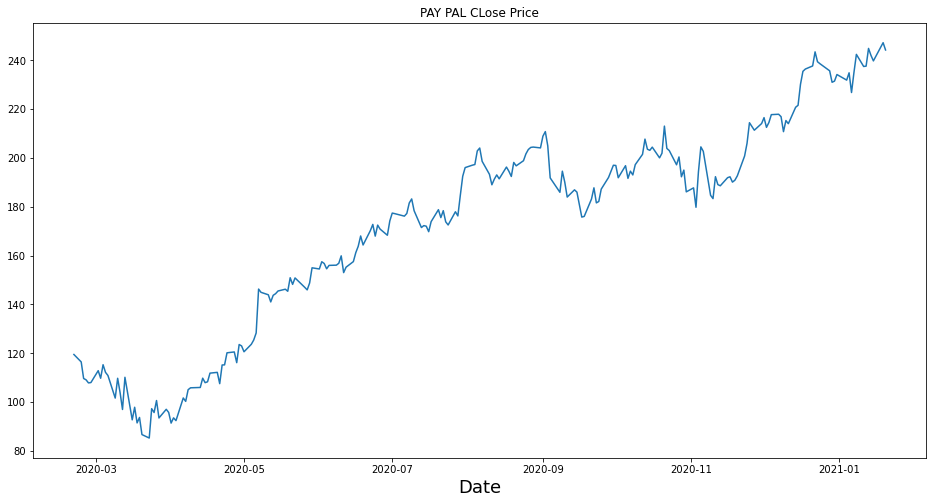

In [84]:
#Plotting the historical close prices
plt.figure(figsize=(16,8))
plt.title("PAY PAL CLose Price")
plt.plot(covid_pp["Close"])
plt.xlabel("Date", fontsize=18)

In [85]:
#Creating a new dataframe with only the closing price
data = covid_pp.filter(['Close'])

#converting data to a numpy array
dataset = data.values
len(dataset)

231

In [86]:
#Preparing the training data using 70% of the data for training
training_data_size = math.ceil(len(dataset)*.7)
training_data_size

162

In [87]:
#Normalizing the data using MinMaxScaler (making all the values between 0 and 1)
scaler = MinMaxScaler(feature_range=(0,1))

#fitting and scaling the features
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.21130932],
       [0.19248102],
       [0.15062659],
       [0.1472313 ],
       [0.13939129],
       [0.14031728],
       [0.17038088],
       [0.15124391],
       [0.18544355],
       [0.16618309],
       [0.15821963],
       [0.10105559],
       [0.15112042],
       [0.11506883],
       [0.07222666],
       [0.15365146],
       [0.04605222],
       [0.07784432],
       [0.03827395],
       [0.05204025],
       [0.00876596],
       [0.        ],
       [0.07426384],
       [0.06451014],
       [0.09488237],
       [0.05074388],
       [0.07265879],
       [0.06469533],
       [0.03778008],
       [0.05099077],
       [0.04401505],
       [0.10130253],
       [0.09272175],
       [0.12222974],
       [0.12704485],
       [0.12790914],
       [0.15139825],
       [0.14007034],
       [0.14229271],
       [0.16414591],
       [0.16612134],
       [0.13753935],
       [0.1847645 ],
       [0.18507313],
       [0.21556885],
       [0.21772947],
       [0.19062904],
       [0.236

In [88]:
#LSTM specifying the shape of the input (3 dimetional, number of samples, steps and features) 
#Creating the training dataset
train_data = scaled_data[0:training_data_size, :]

#splitting the data into x_train and y_train
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i,0])
    if i<=31:
        print(x_train)
        print(y_train)

In [89]:
#converting y_train to a numpy array
y_train = np.asarray(y_train)

In [90]:
#converting x_train to a numpy array
x_train, Y_train = np.array(x_train), np.array(y_train)

#reshaping the data into 3d
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(102, 30, 1)

### Building Compiling training and testing the LSTM model

In [91]:
#Building the LSTM model using sequential
model=Sequential()

#Layer1
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))

#Layer2
model.add(LSTM(50, return_sequences=False))

#Layer2
model.add(Dense(25))

#Output Layer
model.add(Dense(1))

In [92]:
# Summarizing the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 30, 50)            10400     
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_8 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [93]:
#Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [94]:
# Training the model
# Using at least 10 epochs
model.fit(x_train, y_train, batch_size=5, epochs=10, shuffle = False)

Epoch 1/10
21/21 [==============================] - 17s 97ms/step - loss: 0.0473
Epoch 2/10
21/21 [==============================] - 2s 90ms/step - loss: 0.0026
Epoch 3/10
21/21 [==============================] - 2s 91ms/step - loss: 0.0017
Epoch 4/10
21/21 [==============================] - 2s 94ms/step - loss: 0.0021
Epoch 5/10
21/21 [==============================] - 2s 93ms/step - loss: 0.0022
Epoch 6/10
21/21 [==============================] - 2s 99ms/step - loss: 0.0029 ETA: 1s - lo
Epoch 7/10
21/21 [==============================] - 2s 96ms/step - loss: 0.0044
Epoch 8/10
21/21 [==============================] - 2s 96ms/step - loss: 0.0066
Epoch 9/10
21/21 [==============================] - 2s 95ms/step - loss: 0.0097
Epoch 10/10
21/21 [==============================] - 2s 98ms/step - loss: 0.0115


In [95]:
#Using 30% of dataset for testing the model
test_data = scaled_data[training_data_size - 30: , :]
x_test = []
y_test = dataset[training_data_size:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])

In [96]:
#Converting the x_test to a numpy array
x_test = np.array(x_test)

In [97]:
#Reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [98]:
#Making some predictions
predictions = model.predict(x_test)

#getting the values of prediction
predictions = scaler.inverse_transform(predictions)

In [99]:
#Evaluating the model using Root Mean Square Error
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

2.9072820691094883

<function matplotlib.pyplot.show(close=None, block=None)>

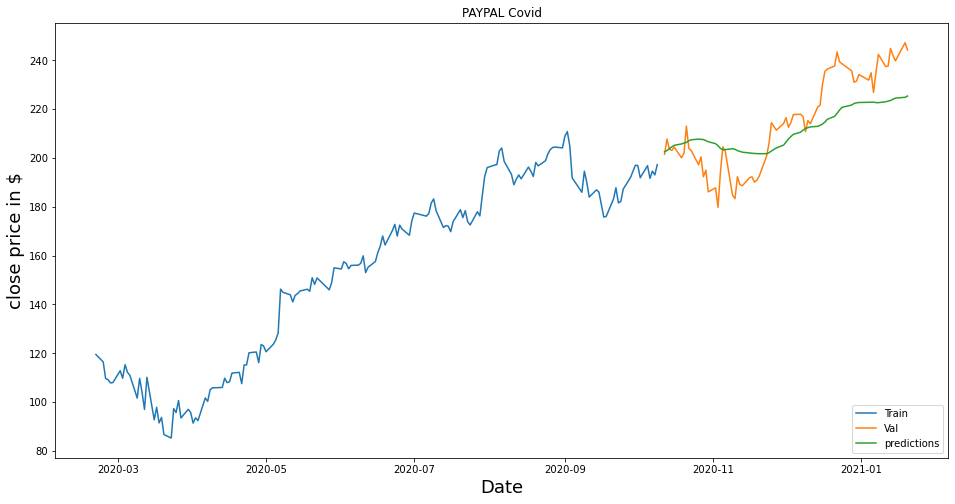

In [100]:
#Plotting the prediction and the actual values data as a line chart
train = data[:training_data_size]
valid = data[training_data_size:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('PAYPAL Covid')
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price in $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show

In [101]:
#Printing the data in a table
valid

,Close,predictions
Date,,
2020-10-12,201.509995,202.543671
2020-10-13,207.740005,203.045853
2020-10-14,203.600006,203.848907
2020-10-15,203.139999,204.570465
2020-10-16,204.449997,205.192566
...,...,...
2021-01-13,244.899994,223.581009
2021-01-14,242.059998,224.085251
2021-01-15,239.789993,224.544464
